# Autoregressive Distributed Lag (ARDL) Model

In [ ]:
import numpy as np
import seaborn as sns

In [ ]:
monthly_hdfc_data_copy = monthly_hdfc_data.copy()

In [ ]:
# Calculate correlations between 'close' and other columns with different lags
first_diff_correlations = {}
corr_cols = ['close']
for col in monthly_hdfc_data.columns:
    if col != 'close':
      monthly_hdfc_data_copy[f'{col}_first_diff'] = monthly_hdfc_data_copy['close'].diff()
      correlation = monthly_hdfc_data_copy['close'].corr(monthly_hdfc_data_copy[f'{col}_first_diff'])
      first_diff_correlations[f'{col}_first_diff'] = correlation
      corr_cols.append(f'{col}_first_diff')


# Sort the lagged variables by correlation
sorted_ln_variables = sorted(first_diff_correlations.items(), key=lambda x: abs(x[1]), reverse=True)

# Print the top 10 lagged variables with the highest absolute correlation
for ln_variable, correlation in sorted_ln_variables[:10]:
    print(f'{ln_variable}: {correlation}')

# Create a heatmap to visualize the correlation matrix
# plt.figure(figsize=(16, 10))
# sns.heatmap(monthly_hdfc_data_copy[corr_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
# plt.title('Correlation Matrix')
# plt.show()

open_first_diff: 0.11179949070714447
high_first_diff: 0.11179949070714447
low_first_diff: 0.11179949070714447
volume_first_diff: 0.11179949070714447
sma5_first_diff: 0.11179949070714447
sma10_first_diff: 0.11179949070714447
sma15_first_diff: 0.11179949070714447
sma20_first_diff: 0.11179949070714447
ema5_first_diff: 0.11179949070714447
ema10_first_diff: 0.11179949070714447


In [ ]:
# Extract column names
ln_column_names = [item[0] for item in sorted_ln_variables[:5]]
monthly_hdfc_data_copy = monthly_hdfc_data_copy.dropna()
ln_column_names

['open_first_diff',
 'high_first_diff',
 'low_first_diff',
 'volume_first_diff',
 'sma5_first_diff']

In [ ]:
for col in ln_column_names:
  test_stationarity(monthly_hdfc_data_copy[col])

In [ ]:
exog = monthly_hdfc_data_copy[ln_column_names]

In [ ]:
from statsmodels.tsa.api import ARDL
from sklearn.model_selection import train_test_split
#train_data = data[['lnGDP','lnENC']]

# Split your data into a training set and a testing set
test_size = 0.2  # You can adjust the test size as needed
X_train, X_test, y_train, y_test = train_test_split(exog, monthly_hdfc_data_copy.close, test_size=test_size, shuffle=False)

# Train the ARDL model on the training data
model = ARDL(y_train, lags=2, exog=X_train, order=(2, 0))
ardl_model = model.fit()

print(ardl_model.summary())

                                ARDL Model Results                                
Dep. Variable:                      close   No. Observations:                   65
Model:             ARDL(2, 2, 2, 2, 2, 2)   Log Likelihood                1749.971
Method:                   Conditional MLE   S.D. of innovations              0.000
Date:                    Fri, 06 Oct 2023   AIC                          -3471.941
Time:                            02:20:09   BIC                          -3441.937
Sample:                        07-31-2015   HQIC                         -3460.141
                             - 09-30-2020                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  4.69e-13   1.05e-13      4.455      0.000    2.58e-13     6.8e-13
close.L1                 1.0000    4.6e-16   2.18e+15      0.000     

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
# Use the trained model to make predictions on the testing data
y_pred = ardl_model.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1, exog_oos=X_test)


In [ ]:

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print model summary and performance metrics

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calculate absolute percentage errors for each data point
ape = np.abs((y_test - y_pred) / y_test)
print(f"absolute percentage errors: {ape}")

# Calculate the mean absolute percentage error (MAPE)
mape = np.mean(ape) * 100  # Convert to percentage
print(f"mean absolute percentage error (MAPE): {mape}")


Mean Absolute Error (MAE): 4.253225222996929e-12
Mean Squared Error (MSE): 2.4426156911859995e-23
Root Mean Squared Error (RMSE): 4.9422825609084715e-12
absolute percentage errors: date
2020-10-31    3.845969e-16
2020-11-30    6.330663e-16
2020-12-31    7.903426e-16
2021-01-31    1.144965e-15
2021-02-28    1.331401e-15
2021-03-31    1.825806e-15
2021-04-30    2.252818e-15
2021-05-31    2.404480e-15
2021-06-30    2.733952e-15
2021-07-31    3.191209e-15
2021-08-31    3.164260e-15
2021-09-30    3.568661e-15
2021-10-31    4.009360e-15
2021-11-30    4.728055e-15
2021-12-31    5.066395e-15
2022-01-31    5.360600e-15
2022-02-28    5.567721e-15
Freq: M, dtype: float64
mean absolute percentage error (MAPE): 2.8328052337514397e-13


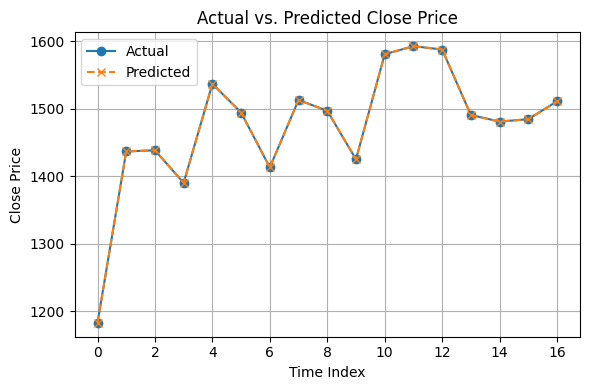

In [ ]:
# import matplotlib.pyplot as plt

# Assuming 'y_test' and 'y_pred' are defined from your previous code

# Create a time index for the test data
time_index = range(len(y_test))

# Plot the actual and predicted values
plt.figure(figsize=(6, 4))
plt.plot(time_index, y_test, label='Actual', marker='o')
plt.plot(time_index, y_pred, label='Predicted', linestyle='--', marker='x')

# Add labels and title
plt.xlabel('Time Index')
plt.ylabel('Close Price')
plt.title('Actual vs. Predicted Close Price')
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
monthly_hdfc_data_copy = monthly_reliance_data.copy()

open_first_diff: 0.1643394531301523
high_first_diff: 0.1643394531301523
low_first_diff: 0.1643394531301523
volume_first_diff: 0.1643394531301523
sma5_first_diff: 0.1643394531301523
sma10_first_diff: 0.1643394531301523
sma15_first_diff: 0.1643394531301523
sma20_first_diff: 0.1643394531301523
ema5_first_diff: 0.1643394531301523
ema10_first_diff: 0.1643394531301523


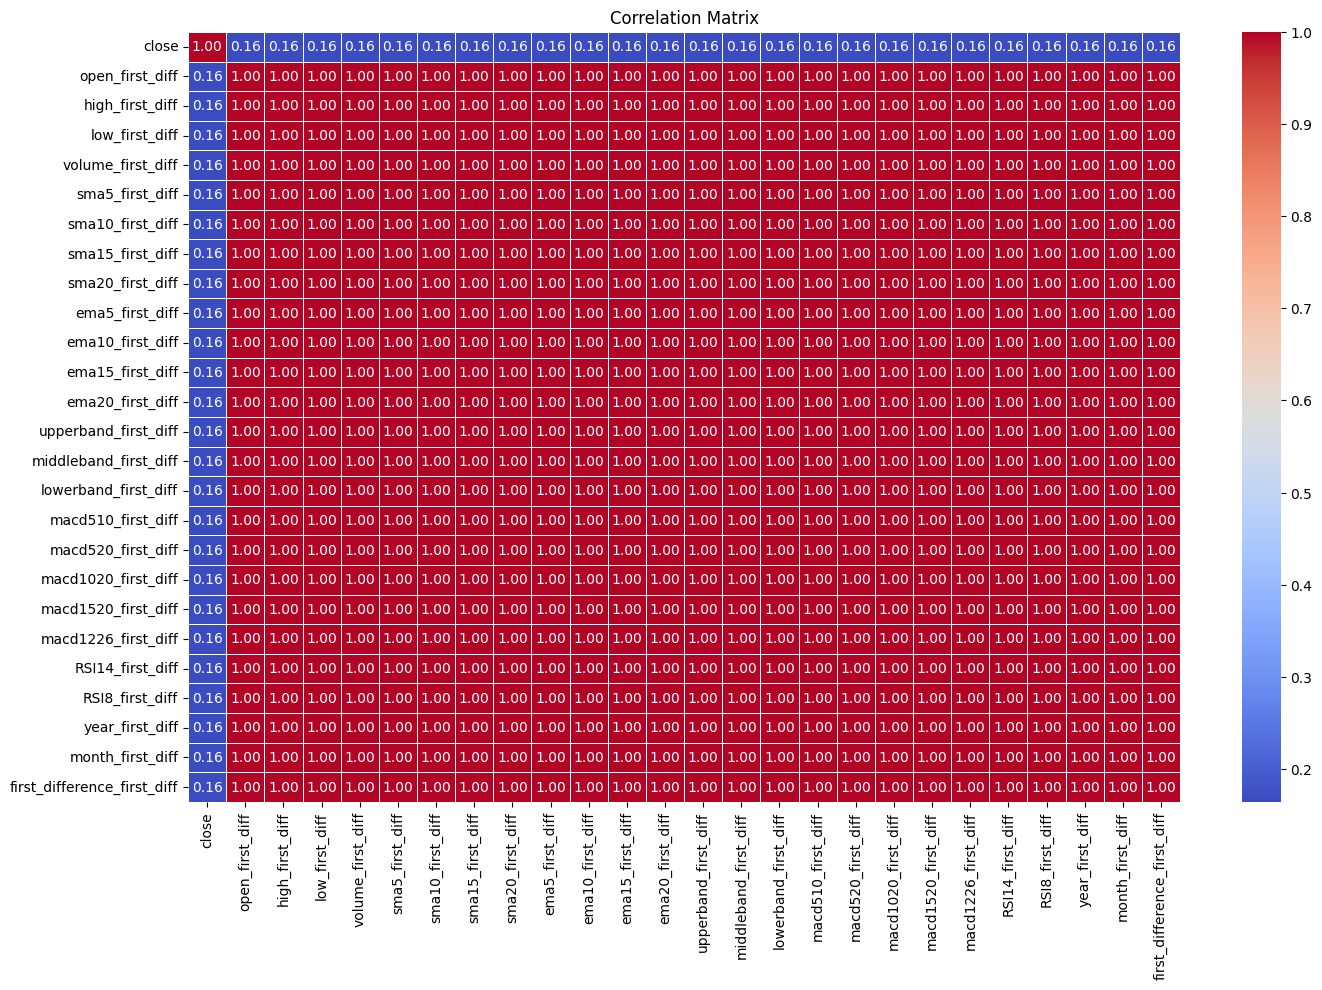

In [ ]:
# Calculate correlations between 'close' and other columns with different lags
first_diff_correlations = {}
corr_cols = ['close']
for col in monthly_hdfc_data.columns:
    if col != 'close':
      monthly_hdfc_data_copy[f'{col}_first_diff'] = monthly_hdfc_data_copy['close'].diff()
      correlation = monthly_hdfc_data_copy['close'].corr(monthly_hdfc_data_copy[f'{col}_first_diff'])
      first_diff_correlations[f'{col}_first_diff'] = correlation
      corr_cols.append(f'{col}_first_diff')


# Sort the lagged variables by correlation
sorted_ln_variables = sorted(first_diff_correlations.items(), key=lambda x: abs(x[1]), reverse=True)

# Print the top 10 lagged variables with the highest absolute correlation
for ln_variable, correlation in sorted_ln_variables[:10]:
    print(f'{ln_variable}: {correlation}')

# Create a heatmap to visualize the correlation matrix
# plt.figure(figsize=(16, 10))
# sns.heatmap(monthly_hdfc_data_copy[corr_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
# plt.title('Correlation Matrix')
# plt.show()

In [ ]:
# Extract column names
ln_column_names = [item[0] for item in sorted_ln_variables[:5]]
monthly_hdfc_data_copy = monthly_hdfc_data_copy.dropna()
ln_column_names

['open_first_diff',
 'high_first_diff',
 'low_first_diff',
 'volume_first_diff',
 'sma5_first_diff']

In [ ]:
for col in ln_column_names:
  test_stationarity(monthly_hdfc_data_copy[col])

In [ ]:
exog = monthly_hdfc_data_copy[ln_column_names]

In [ ]:
from statsmodels.tsa.api import ARDL
from sklearn.model_selection import train_test_split
#train_data = data[['lnGDP','lnENC']]

# Split your data into a training set and a testing set
test_size = 0.2  # You can adjust the test size as needed
X_train, X_test, y_train, y_test = train_test_split(exog, monthly_hdfc_data_copy.close, test_size=test_size, shuffle=False)

# Train the ARDL model on the training data
model = ARDL(y_train, lags=2, exog=X_train, order=(2, 0))
ardl_model = model.fit()

print(ardl_model.summary())

                                ARDL Model Results                                
Dep. Variable:                      close   No. Observations:                   66
Model:             ARDL(2, 2, 2, 2, 2, 2)   Log Likelihood                1735.587
Method:                   Conditional MLE   S.D. of innovations              0.000
Date:                    Fri, 06 Oct 2023   AIC                          -3443.174
Time:                            02:22:17   BIC                          -3412.950
Sample:                        06-30-2015   HQIC                         -3431.268
                             - 09-30-2020                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 6.253e-13   1.35e-13      4.616      0.000    3.53e-13    8.97e-13
close.L1                 1.0000   5.37e-16   1.86e+15      0.000     

In [ ]:
# Use the trained model to make predictions on the testing data
y_pred = ardl_model.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1, exog_oos=X_test)


In [ ]:

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print model summary and performance metrics

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calculate absolute percentage errors for each data point
ape = np.abs((y_test - y_pred) / y_test)
print(f"absolute percentage errors: {ape}")

# Calculate the mean absolute percentage error (MAPE)
mape = np.mean(ape) * 100  # Convert to percentage
print(f"mean absolute percentage error (MAPE): {mape}")


Mean Absolute Error (MAE): 0.0
Mean Squared Error (MSE): 0.0
Root Mean Squared Error (RMSE): 0.0
absolute percentage errors: date
2020-10-31    0.0
2020-11-30    0.0
2020-12-31    0.0
2021-01-31    0.0
2021-02-28    0.0
2021-03-31    0.0
2021-04-30    0.0
2021-05-31    0.0
2021-06-30    0.0
2021-07-31    0.0
2021-08-31    0.0
2021-09-30    0.0
2021-10-31    0.0
2021-11-30    0.0
2021-12-31    0.0
2022-01-31    0.0
2022-02-28    0.0
Freq: M, dtype: float64
mean absolute percentage error (MAPE): 0.0


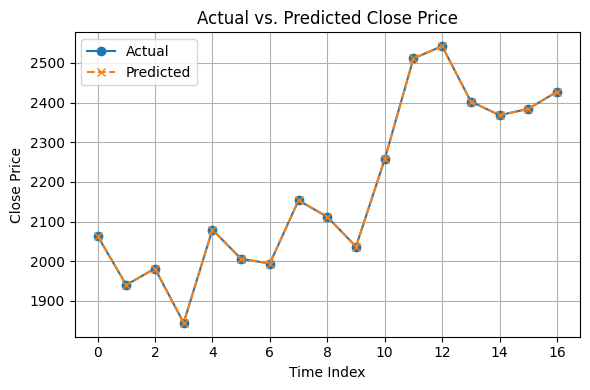

In [ ]:
# import matplotlib.pyplot as plt

# Assuming 'y_test' and 'y_pred' are defined from your previous code

# Create a time index for the test data
time_index = range(len(y_test))

# Plot the actual and predicted values
plt.figure(figsize=(6, 4))
plt.plot(time_index, y_test, label='Actual', marker='o')
plt.plot(time_index, y_pred, label='Predicted', linestyle='--', marker='x')

# Add labels and title
plt.xlabel('Time Index')
plt.ylabel('Close Price')
plt.title('Actual vs. Predicted Close Price')
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
monthly_hdfc_data_copy = monthly_sunpharma_data.copy()

open_first_diff: 0.08553082660095886
high_first_diff: 0.08553082660095886
low_first_diff: 0.08553082660095886
volume_first_diff: 0.08553082660095886
sma5_first_diff: 0.08553082660095886
sma10_first_diff: 0.08553082660095886
sma15_first_diff: 0.08553082660095886
sma20_first_diff: 0.08553082660095886
ema5_first_diff: 0.08553082660095886
ema10_first_diff: 0.08553082660095886


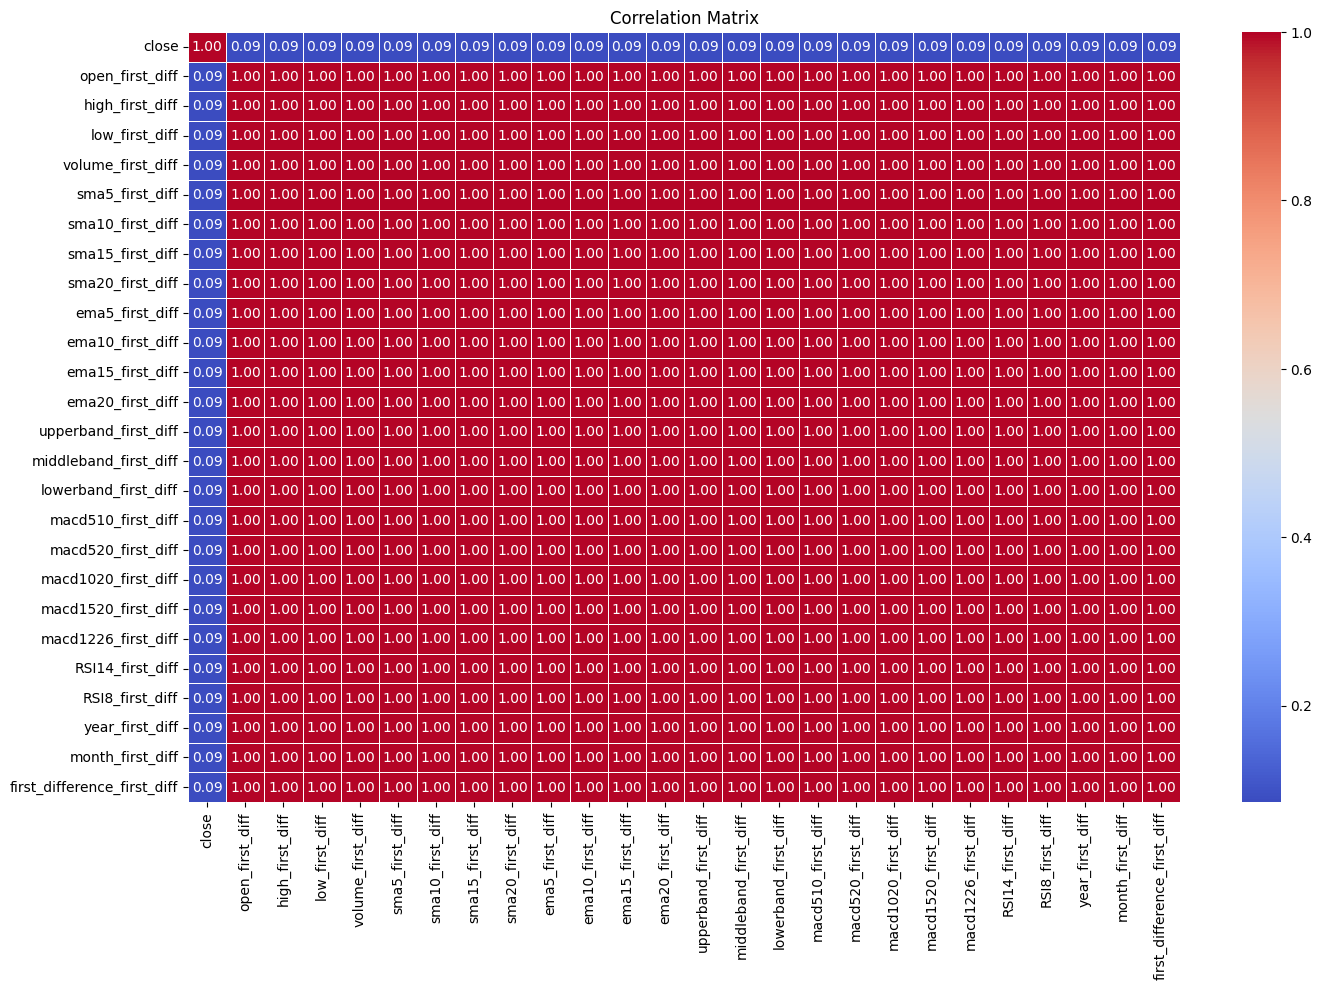

In [ ]:
# Calculate correlations between 'close' and other columns with different lags
first_diff_correlations = {}
corr_cols = ['close']
for col in monthly_hdfc_data.columns:
    if col != 'close':
      monthly_hdfc_data_copy[f'{col}_first_diff'] = monthly_hdfc_data_copy['close'].diff()
      correlation = monthly_hdfc_data_copy['close'].corr(monthly_hdfc_data_copy[f'{col}_first_diff'])
      first_diff_correlations[f'{col}_first_diff'] = correlation
      corr_cols.append(f'{col}_first_diff')


# Sort the lagged variables by correlation
sorted_ln_variables = sorted(first_diff_correlations.items(), key=lambda x: abs(x[1]), reverse=True)

# Print the top 10 lagged variables with the highest absolute correlation
for ln_variable, correlation in sorted_ln_variables[:10]:
    print(f'{ln_variable}: {correlation}')

# Create a heatmap to visualize the correlation matrix
# plt.figure(figsize=(16, 10))
# sns.heatmap(monthly_hdfc_data_copy[corr_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
# plt.title('Correlation Matrix')
# plt.show()

In [ ]:
# Extract column names
ln_column_names = [item[0] for item in sorted_ln_variables[:5]]
monthly_hdfc_data_copy = monthly_hdfc_data_copy.dropna()
ln_column_names

['open_first_diff',
 'high_first_diff',
 'low_first_diff',
 'volume_first_diff',
 'sma5_first_diff']

In [ ]:
for col in ln_column_names:
  test_stationarity(monthly_hdfc_data_copy[col])

In [ ]:
exog = monthly_hdfc_data_copy[ln_column_names]

In [ ]:
from statsmodels.tsa.api import ARDL
from sklearn.model_selection import train_test_split
#train_data = data[['lnGDP','lnENC']]

# Split your data into a training set and a testing set
test_size = 0.2  # You can adjust the test size as needed
X_train, X_test, y_train, y_test = train_test_split(exog, monthly_hdfc_data_copy.close, test_size=test_size, shuffle=False)

# Train the ARDL model on the training data
model = ARDL(y_train, lags=2, exog=X_train, order=(2, 0))
ardl_model = model.fit()

print(ardl_model.summary())

                                ARDL Model Results                                
Dep. Variable:                      close   No. Observations:                   66
Model:             ARDL(2, 2, 2, 2, 2, 2)   Log Likelihood                1783.996
Method:                   Conditional MLE   S.D. of innovations              0.000
Date:                    Fri, 06 Oct 2023   AIC                          -3539.992
Time:                            02:24:46   BIC                          -3509.768
Sample:                        06-30-2015   HQIC                         -3528.085
                             - 09-30-2020                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1.137e-13   9.78e-14     -1.163      0.250    -3.1e-13    8.26e-14
close.L1                 1.0000   5.04e-16   1.98e+15      0.000     

In [ ]:
# Use the trained model to make predictions on the testing data
y_pred = ardl_model.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1, exog_oos=X_test)


In [ ]:

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print model summary and performance metrics

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calculate absolute percentage errors for each data point
ape = np.abs((y_test - y_pred) / y_test)
print(f"absolute percentage errors: {ape}")

# Calculate the mean absolute percentage error (MAPE)
mape = np.mean(ape) * 100  # Convert to percentage
print(f"mean absolute percentage error (MAPE): {mape}")


Mean Absolute Error (MAE): 1.5180536566356965e-12
Mean Squared Error (MSE): 3.070755968843455e-24
Root Mean Squared Error (RMSE): 1.7523572606188086e-12
absolute percentage errors: date
2020-10-31    4.879263e-16
2020-11-30    6.667850e-16
2020-12-31    7.701708e-16
2021-01-31    1.156137e-15
2021-02-28    1.336481e-15
2021-03-31    1.521785e-15
2021-04-30    1.564737e-15
2021-05-31    1.872089e-15
2021-06-30    2.190985e-15
2021-07-31    2.057680e-15
2021-08-31    2.288469e-15
2021-09-30    2.502278e-15
2021-10-31    2.856453e-15
2021-11-30    3.327715e-15
2021-12-31    3.096267e-15
2022-01-31    3.407879e-15
2022-02-28    3.418758e-15
Freq: M, dtype: float64
mean absolute percentage error (MAPE): 2.0307408635610314e-13


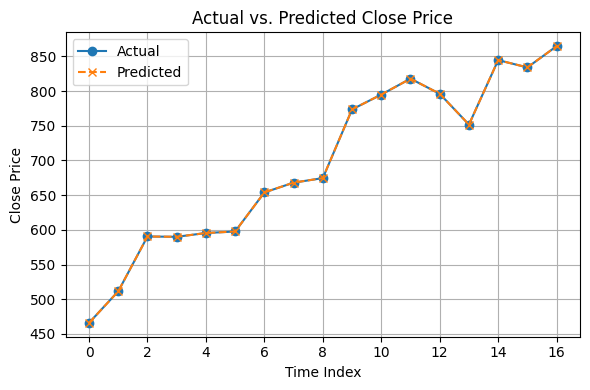

In [ ]:
# import matplotlib.pyplot as plt

# Assuming 'y_test' and 'y_pred' are defined from your previous code

# Create a time index for the test data
time_index = range(len(y_test))

# Plot the actual and predicted values
plt.figure(figsize=(6, 4))
plt.plot(time_index, y_test, label='Actual', marker='o')
plt.plot(time_index, y_pred, label='Predicted', linestyle='--', marker='x')

# Add labels and title
plt.xlabel('Time Index')
plt.ylabel('Close Price')
plt.title('Actual vs. Predicted Close Price')
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()
